In [14]:
import ctypes
lib = ctypes.CDLL('.\caplib.dll')

In [15]:
# lib.test.argtypes = [ctypes.c_int]
# lib.test.restype = None
# lib.test(123) # Note: prints fine in terminal but not in jupyter
# lib.SqWaveCalc.argtypes = [ctypes.c_int,ctypes.c_int,ctypes.c_double]
# lib.SqWaveCalc.restype = None
lib.Dfilter2.restype = None
lib.Dfilter2.argtypes = [ctypes.c_int, ctypes.POINTER(ctypes.c_double), ctypes.c_int, ctypes.c_int, ctypes.c_int, ctypes.POINTER(ctypes.c_double)]
        

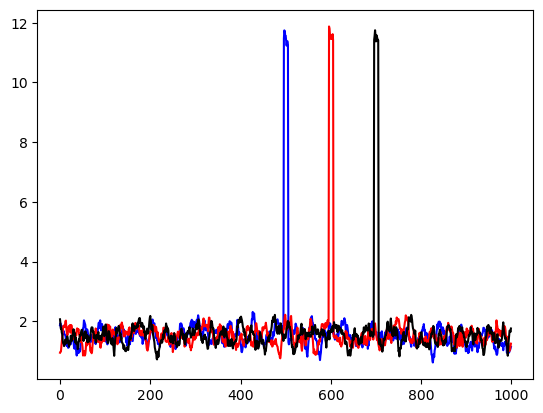

In [48]:
import numpy as np
from matplotlib import pyplot as plt
from timeit import timeit

# output = np.empty(100)
# lib.SqWaveCalc(100,20,40,output.ctypes.data_as(ctypes.POINTER(ctypes.c_double)))
# plt.plot(output)
data0 = np.random.rand(1000)*3
data0[500] = 100
data1 = np.random.rand(1000)*3
data1[600] = 100
data2 = np.random.rand(1000)*3
data2[700] = 100
# exetime = timeit(lambda:lib.Dfilter2(
#     2,
#     data.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
#     10,
#     0,
#     data.size,
#     data.ctypes.data_as(ctypes.POINTER(ctypes.c_double))),number = 1)
for data in [data0,data1,data2]:
    lib.Dfilter2(
    1,
    data.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    10,
    0,
    data.size,
    data.ctypes.data_as(ctypes.POINTER(ctypes.c_double)))

plt.plot(data0,'b')
plt.plot(data1,'r')
plt.plot(data2,'k')

# print(f'{data.size/20/60} min of data at 20Hz')
# print(exetime)

In [41]:
from tkinter import filedialog, Tk
from pathlib import Path
import numpy as np

def uigetfile(**kargs):
        '''
        **kargs include:
        parent - the window to place the dialog on top of
        title - the title of the window
        initialdir - the directory that the dialog starts in
        initialfile - the file selected upon opening of the dialog
        filetypes - a sequence of (label, pattern) tuples, ‘*’ wildcard is allowed
        defaultextension - default extension to append to file (save dialogs)
        multiple - when true, selection of multiple items is allowed
        Ref: https://docs.python.org/3/library/dialog.html#module-tkinter.filedialog
        Ref: https://realpython.com/python-pathlib/
        '''
        root = Tk()
        root.attributes('-topmost',True)
        root.withdraw()
        file = filedialog.askopenfilename(**kargs)
        root.destroy()
        return Path(file)

file = uigetfile()
data = np.load(file,allow_pickle=True).item()

In [44]:
print(data['labelindex'][0][0])

1


In [46]:
import numpy as np
a = [0,1,2,3]
def test(a,s,d):
    print(f'{a},{s},{d}')
test(*a[1:4])
# a = [None]*2
# a[0] = 0
# a[1] = 1
# print(a)

1,2,3
